# Lista de Exercícios de Estatística

1. Na análise de concessão de empréstimos, uma variável potencialmente importante é a renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma análise por meio de tabela de frequências. Neste sentido, pede-se:

    a) Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.  
    
   b) Em seguida, elabore a tabela de frequências para as faixas de renda acima.

## Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import nbinom
import math
import numpy as np
from scipy.stats import norm

## Exercício 1

1. Na análise de concessão de empréstimos, uma variável potencialmente importante é a renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma análise por meio de tabela de frequências. Neste sentido, pede-se:

    a) Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.  
    b) Em seguida, elabore a tabela de frequências para as faixas de renda acima.

In [3]:
renda = {'renda': ['2.894,00','3.448,00','1.461,00','2.224,00','2.501,00','1.100,00','3.560,00','5.511,00','2.901,00','10.128,00',
                '1.855,00','3.161,00','8.630,00','6.201,00','4.130,00','2.736,00','4.448,00','2.150,00','4.595,00','5.561,00',
                 '2.800,00','9.538,00','2.000,00','3.226,00','1.900,00','7.665,00','3.890,00','6.590,00','1.241,00','1.720,00',
                 '2.556,00','4.730,00','4.745,00','8.550,00','3.860,00','11.320,00','6.125,00','5.606,00','3.250,00','1.500,00',
                 '9.216,00','4.999,00','3.900,00','7.000,00','3.508,00','1.130,00','4.121,00','2.601,00','2.901,00','4.871,00'
                ]}
df1 = pd.DataFrame(renda)

O valor é do tipo float, mas no formato original dos dados o python não reconhece, porque o ponto é utilizado como separador decimal, e não a vírgula

In [4]:
#converter para o tipo float
df1['renda'] = df1['renda'].str.replace('.','',regex=False).str.replace(',','.',regex=False).astype(float)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   renda   50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


In [6]:
intervalo = [0, 2000, 4000, 6000, 8000, 10000, 12000]
rotulos = ['0-2.000','2.001-4.000','4.001-6.000','6.001-8.000','8.001-10.000','10.001-12.000']

In [7]:
df1['Faixa de Renda'] = pd.cut(df1['renda'], bins=intervalo, labels=rotulos, right=True, include_lowest=True)
#cut = é utilizado para separar dados numéricos em intervalos específicos
#bins = os limites dos intervalos
#labels = rótulos das categorias resultantes
#right = Indica se os intervalos devem incluir o valor à direita ou não (True <=, False <)
#include_lowest = define se o valor mais baixo será incluído no intervalo

In [8]:
df1.head(5)

,renda,Faixa de Renda
0,2894.0,2.001-4.000
1,3448.0,2.001-4.000
2,1461.0,0-2.000
3,2224.0,2.001-4.000
4,2501.0,2.001-4.000


In [9]:
faixa_renda = df1['Faixa de Renda'].value_counts().sort_index().reset_index()
#value_counts() = Conta quantas vezes cada faixa aparece na coluna. O resultado é uma Series com os rótulos como índice e as contagens como valores.
#sort_index() = Ordena a Series de acordo com o índice, ou seja, coloca as faixas de renda em ordem crescente.
#reset_index() = Transforma a Series resultante em um novo DataFrame

In [10]:
# Renomeando colunas
faixa_renda.columns = ['Faixa de Renda', 'Frequencia Absoluta']
faixa_renda

,Faixa de Renda,Frequencia Absoluta
0,0-2.000,9
1,2.001-4.000,19
2,4.001-6.000,11
3,6.001-8.000,5
4,8.001-10.000,4
5,10.001-12.000,2


In [11]:
# Frequência relativa (%)
total = faixa_renda['Frequencia Absoluta'].sum()
faixa_renda['Freq. Relativa (%)'] = (faixa_renda['Frequencia Absoluta'] / total * 100).round(2)

# Frequência absoluta acumulada 
faixa_renda['Freq. Abs. Acumulada'] = faixa_renda['Frequencia Absoluta'].cumsum()

# Frequência relativa acumulada (%)
faixa_renda['Freq. Rel. Acumulada (%)'] = faixa_renda['Freq. Relativa (%)'].cumsum().round(2)

In [12]:
faixa_renda

,Faixa de Renda,Frequencia Absoluta,Freq. Relativa (%),Freq. Abs. Acumulada,Freq. Rel. Acumulada (%)
0,0-2.000,9,18.0,9,18.0
1,2.001-4.000,19,38.0,28,56.0
2,4.001-6.000,11,22.0,39,78.0
3,6.001-8.000,5,10.0,44,88.0
4,8.001-10.000,4,8.0,48,96.0
5,10.001-12.000,2,4.0,50,100.0


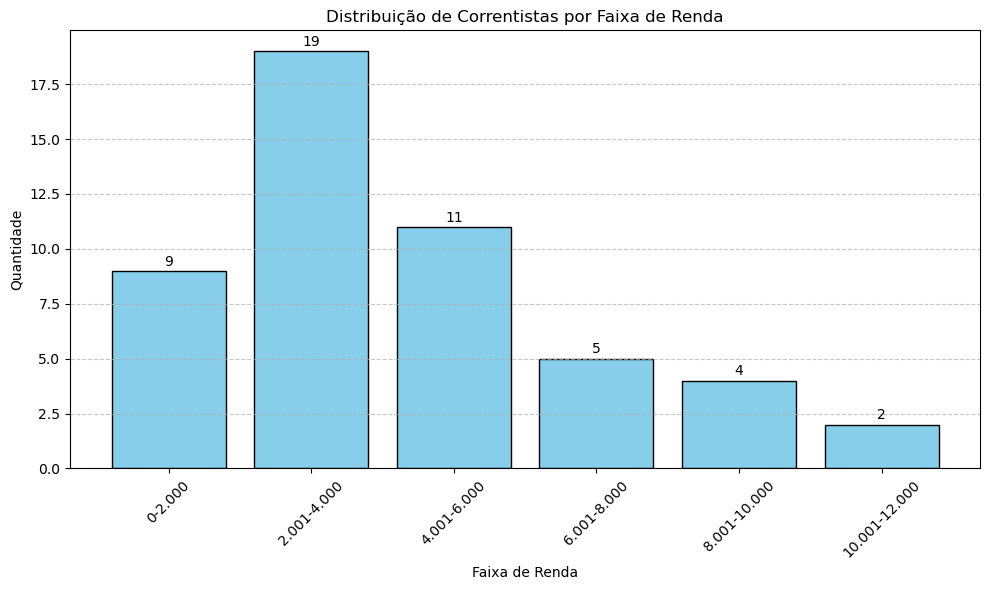

In [13]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de barras
bars = plt.bar(faixa_renda['Faixa de Renda'], faixa_renda['Frequencia Absoluta'], color='skyblue', edgecolor='black')

# Adiciona rótulos de dados no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,   # posição
             f'{int(height)}',                                  # texto (valor inteiro)
             ha='center', va='bottom', fontsize=10)

# Títulos e rótulos
plt.title('Distribuição de Correntistas por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.tight_layout()
plt.show()

## Exercício 2

2. Um analista do mercado acionário coletou os retornos mensais de duas ações que pretende indicar aos seus clientes. Calcule as estatísticas descritivas para as duas variáveis. Posteriormente, analise o coeficiente de correlação de Pearson entre os retornos.

In [27]:
acoes = {'acao_1': [-0.0212,0.2438,0.2296,-0.2018,0.1296,0.0615,-0.1591,-0.1001,-0.0265,0.0776,0.0370,0.1116,
                    -0.0667,-0.0082,0.0119,0.1205,0.0477,0.2814,-0.0674,0.0762,-0.1111,-0.0557,0.1991],
         'acao_2': [0.2645,0.2086,0.1248,0.0209,0.2055,0.6260,-0.1490,0.2580,0.1722,0.0199,0.4331,0.5482,
                    0.0452,-0.1410,-0.1059,0.4074,-0.0056,0.1482,0.0753,0.0899,0.0160,0.1805,0.0334]}
df2 = pd.DataFrame(acoes)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   acao_1  23 non-null     float64
 1   acao_2  23 non-null     float64
dtypes: float64(2)
memory usage: 500.0 bytes


In [29]:
df2.describe()

,acao_1,acao_2
count,23.000000,23.000000
mean,0.035204,0.151135
std,0.129221,0.203822
min,-0.201800,-0.149000
25%,-0.061200,0.020400
50%,0.037000,0.124800
75%,0.116050,0.233300
max,0.281400,0.626000


C:\Users\bruna\AppData\Local\Temp\ipykernel_14244\946664226.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df2['acao_1'], df2['acao_2']], labels=['Ação 1', 'Ação 2'])


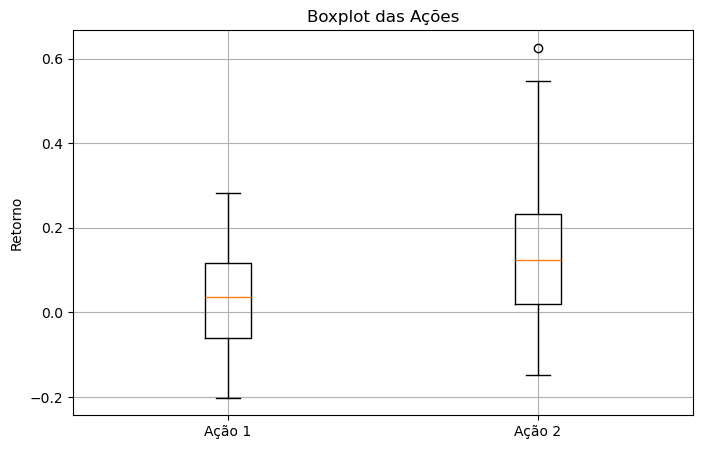

In [30]:
plt.figure(figsize=(8, 5))
plt.boxplot([df2['acao_1'], df2['acao_2']], labels=['Ação 1', 'Ação 2'])
plt.title('Boxplot das Ações')
plt.ylabel('Retorno')
plt.grid(True)
plt.show()

In [31]:
# Correlação de Pearson e estatística t
r, p_valor = stats.pearsonr(df2['acao_1'], df2['acao_2'])
n = len(df2)
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
# Valor crítico para teste bicaudal com alfa = 0.05
alpha = 0.05
t_critico = stats.t.ppf(1 - alpha/2, df=n - 2)
print(f"Valor crítico t: {t_critico:.4f}")
print(f"Correlação de Pearson: {r:.4f}")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_valor:.4f}")

Valor crítico t: 2.0796
Correlação de Pearson: 0.2908
Estatística t: 1.3929
Valor p: 0.1782


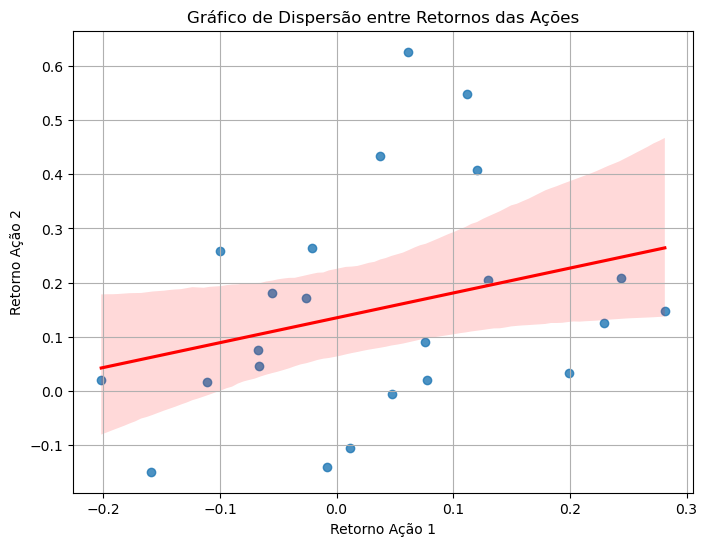

In [32]:
plt.figure(figsize=(8, 6))
sns.regplot(x='acao_1', y='acao_2', data=df2, line_kws={"color": "red"})
plt.title('Gráfico de Dispersão entre Retornos das Ações')
plt.xlabel('Retorno Ação 1')
plt.ylabel('Retorno Ação 2')
plt.grid(True)
plt.show()

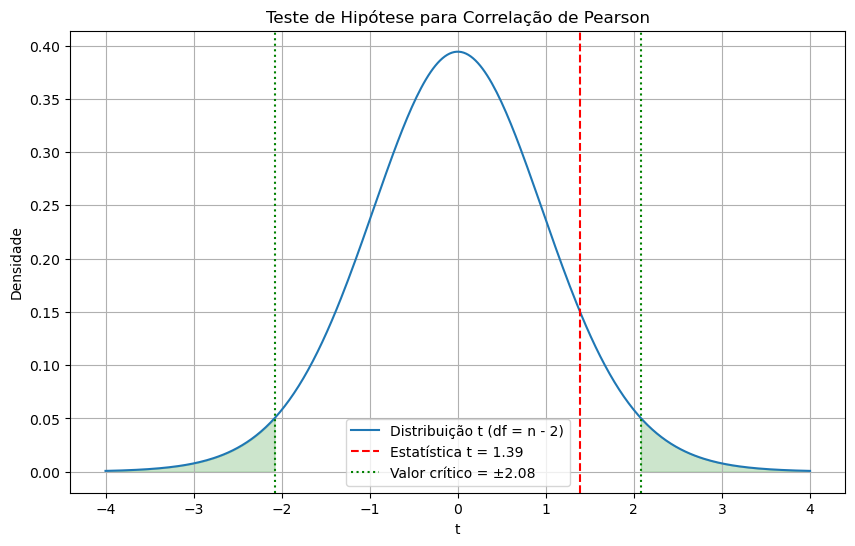

In [33]:
# Gráfico
x = np.linspace(-4, 4, 300)
y = stats.t.pdf(x, df=n - 2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t (df = n - 2)')
plt.axvline(t_stat, color='red', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
plt.axvline(-t_critico, color='green', linestyle=':', label=f'Valor crítico = ±{t_critico:.2f}')
plt.axvline(t_critico, color='green', linestyle=':')

# Áreas de rejeição (opcional)
x_fill_right = np.linspace(t_critico, 4, 100)
x_fill_left = np.linspace(-4, -t_critico, 100)
plt.fill_between(x_fill_right, stats.t.pdf(x_fill_right, df=n - 2), color='green', alpha=0.2)
plt.fill_between(x_fill_left, stats.t.pdf(x_fill_left, df=n - 2), color='green', alpha=0.2)

plt.title('Teste de Hipótese para Correlação de Pearson')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()


Interpretação Detalhada:
1. Correlação observada (r = 0.2908):
Existe uma correlação positiva fraca entre os retornos das duas ações. Ou seja, quando uma ação sobe, a outra tende a subir também — mas a relação é fraca e inconsistente.

2. Valor da estatística t vs. valor crítico:
t observado (1.3929) é menor que o valor crítico de ±2.0796, portanto não caímos na região crítica.

3. p-valor (0.1782) > 0.05:
O p-valor é maior do que o nível de significância convencional (5%).

Conclusão: Não rejeitamos a hipótese nula.
A correlação não é estatisticamente significativa ao nível de 5%.

## Exercício 3

3. Em certo jogo, probabilidade de vitória (sucesso) a cada nova jogada é 1/6.
Se forem feitas 10 jogadas, quais são as seguintes probabilidades:

    a) Ter vitória em 4 jogadas.

    b) Ter vitória em pelo menos 7 jogadas.

In [36]:
# Parâmetros da distribuição binomial
n = int(input("Digite o número de jogadas (n): "))
p = float(input("Digite a probabilidade de sucesso por jogada (entre 0 e 1): "))
k = int(input("Digite o número de vitórias desejadas (k): "))

# Cálculo da probabilidade de exatamente k vitórias
prob_k = binom.pmf(k, n, p)
print(f"\nProbabilidade de exatamente {k} vitórias em {n} jogadas: P(X = {k}) = {prob_k:.6f} = {prob_k*100:.2f}%")

# Cálculo da probabilidade de pelo menos k vitórias
prob_mais_k = 1 - binom.cdf(k - 1, n, p)
print(f"Probabilidade de pelo menos {k} vitórias: P(X ≥ {k}) = {prob_mais_k:.6f} = {prob_mais_k*100:.2f}%")


Probabilidade de exatamente 12 vitórias em 25 jogadas: P(X = 12) = 0.154981 = 15.50%
Probabilidade de pelo menos 12 vitórias: P(X ≥ 12) = 0.654981 = 65.50%


## Exercício 4

4. (Fonte: Fávero e Belfiore, 2024, Cap. 5) Suponha que um aluno acerte três questões a cada cinco testes. Seja X o número de tentativas até o décimo segundo acerto. Determine a probabilidade de que o aluno precise fazer 20 questões para acertar 12.

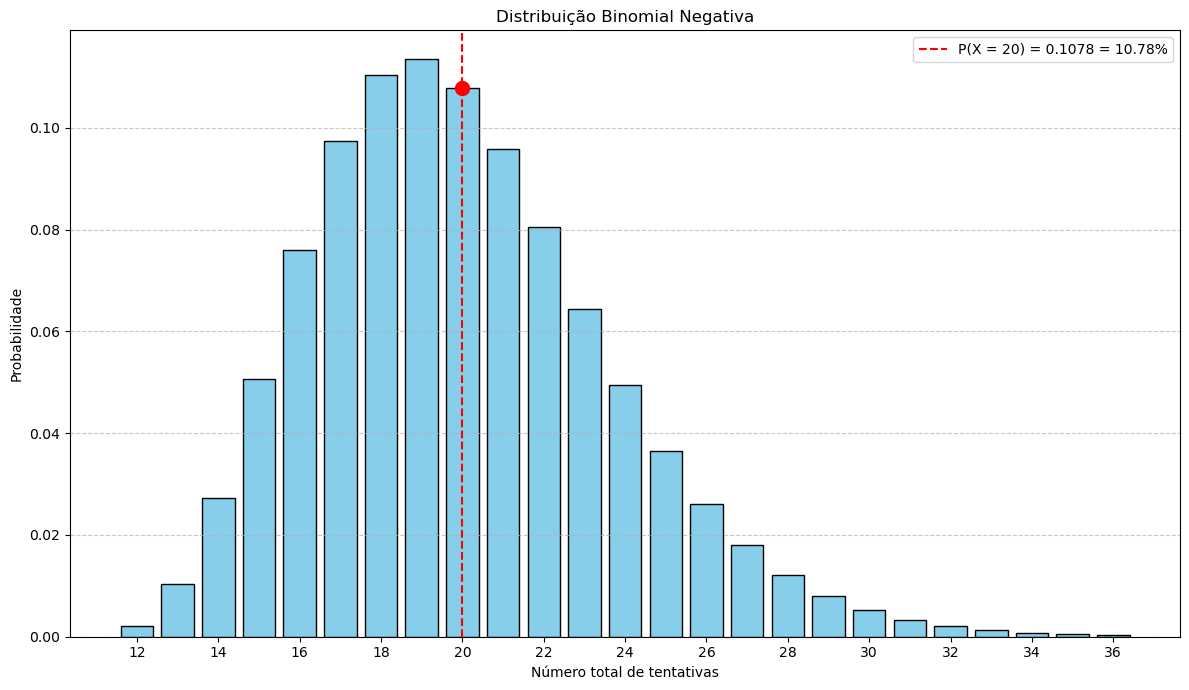

In [39]:
# Entrada dos parâmetros
r = int(input("Digite o número de acertos desejado (r): "))
p = float(input("Digite a probabilidade de acerto por tentativa (entre 0 e 1): "))
x_especifico = int(input("Digite o número de tentativas (x): "))

# Validando o valor de x_especifico
if x_especifico < r:
    print(f"O número de tentativas ({x_especifico}) deve ser maior ou igual ao número de acertos desejado ({r}).")
else:
    # Encontrando o limite superior para x onde a probabilidade acumulada atinge um limiar (ex: 99%)
    prob_acumulada = 0.0
    x_limite = r
    while prob_acumulada < 0.999:  # Aumentei para 99.9% para capturar ainda mais probabilidade
        prob = nbinom.pmf(x_limite - r, r, p)
        prob_acumulada += prob
        x_limite += 1

    # Gerando valores da distribuição até o limite encontrado
    x = np.arange(r, x_limite + 1)
    y = nbinom.pmf(x - r, r, p)

    # Plotando o gráfico
    plt.figure(figsize=(12, 7))
    bars = plt.bar(x, y, color='skyblue', edgecolor='black')

    # Adicionando rótulos em cada barra (opcional, pode ficar denso se x_limite for muito grande)
    # for bar, prob in zip(bars, y):
    #     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001,
    #              f"{prob:.4f}", ha='center', va='bottom', fontsize=8)

    # Destacando a probabilidade para o número de tentativas específico
    if r <= x_especifico <= x_limite:
        prob_especifico = nbinom.pmf(x_especifico - r, r, p)
        plt.axvline(x_especifico, color='red', linestyle='--', label=f'P(X = {x_especifico}) = {prob_especifico:.4f} = {prob_especifico*100:.2f}%')
        plt.scatter(x_especifico, prob_especifico, color='red', s=100)  # Adiciona um ponto destacado

    # Título e eixos
    plt.title(f'Distribuição Binomial Negativa')
    plt.xlabel('Número total de tentativas')
    plt.ylabel('Probabilidade')
    plt.xticks(np.arange(r, x_limite + 1, step=max(1, (x_limite - r) // 10))) # Ajusta os ticks do eixo x
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Exercício 5

Suponha que o número de acidentes de trânsito em determinada cidade seja,
em média, de 5 acidentes por dia e que siga uma distribuição Poisson. Calcule
a probabilidade de que, em tal cidade, ocorram 9 acidentes de trânsito em um
dia.

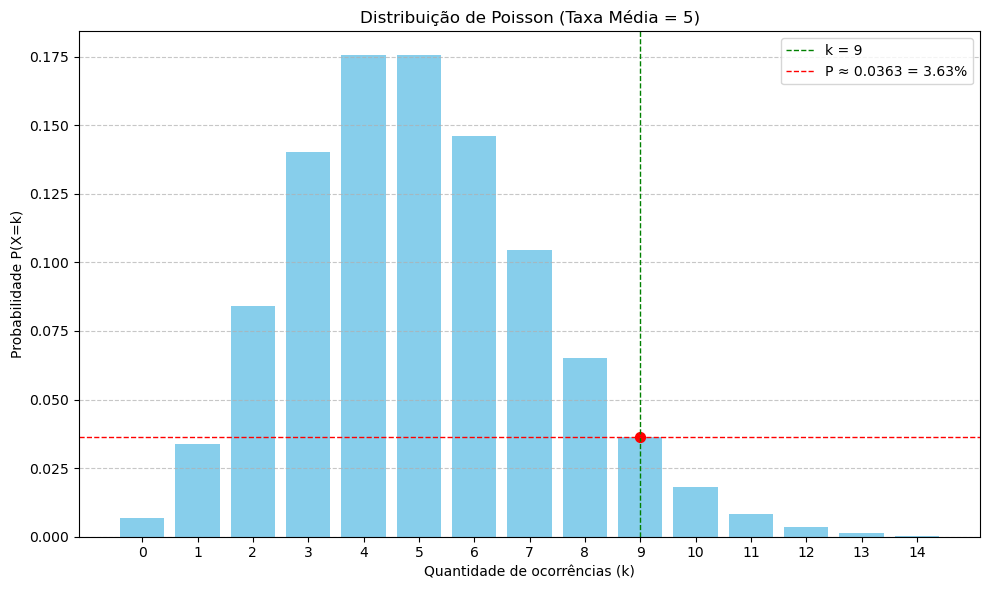

In [40]:
# Entrada dos parâmetros
tx = int(input("Digite a taxa média (lambda): "))
k_destaque = int(input("Digite o número de sucessos de interesse (k): "))

# Gerando os valores de k (número de sucessos) para o gráfico
k_valores = np.arange(0, 2 * tx + 5)  # Um intervalo razoável para visualizar a distribuição

# Calculando as probabilidades para cada valor de k
probabilidades = [(math.exp(-tx) * (tx ** k)) / math.factorial(k) for k in k_valores]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(k_valores, probabilidades, color='skyblue')
plt.xlabel('Quantidade de ocorrências (k)')
plt.ylabel('Probabilidade P(X=k)')
plt.title(f'Distribuição de Poisson (Taxa Média = {tx})')
plt.xticks(k_valores)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Destacando o valor de k e P
if k_destaque in k_valores:
    prob_destaque = (math.exp(-tx) * (tx ** k_destaque)) / math.factorial(k_destaque)
    plt.axvline(k_destaque, color='green', linestyle='--', linewidth=1, label=f'k = {k_destaque}')
    plt.axhline(prob_destaque, color='red', linestyle='--', linewidth=1, label=f'P ≈ {prob_destaque:.4f} = {prob_destaque*100:.2f}%')
    plt.scatter(k_destaque, prob_destaque, color='red', s=50)
else:
    print(f"O valor de k digitado ({k_destaque}) está fora do intervalo visualizado no gráfico.")

plt.legend()
plt.tight_layout()
plt.show()

## Exercício 6

6. Nos últimos meses, foram feitas medições do tempo decorrido entre o início
e finalização de uma das etapas do processo de produção de certo produto. O
tempo médio foi calculado em 26,5 minutos e o desvio padrão foi de 4,0
minutos. Sabendo que tal variável segue uma distribuição normal, identifique
as seguintes informações:

    a) P(X>37)

    b) P(X<20)
    
    c) P(22<X<28)

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bruna\AppData\Local\Temp\ipykernel_14244\682354438.py:5: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x, y, 'k', linewidth=2, label=f'$\mu={media:.2f}, \sigma={desvio_padrao:.2f}$')
C:\Users\bruna\AppData\Local\Temp\ipykernel_14244\682354438.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y, 'k', linewidth=2, label=f'$\mu={media:.2f}, \sigma={desvio_padrao:.2f}$')
C:\Users\bruna\AppData\Local\Temp\ipykernel_14244\682354438.py:8: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title(f'Distribuição Normal ($\mu={media:.2f}, \sigma={desvio_padrao:.2f}$)')
C:\

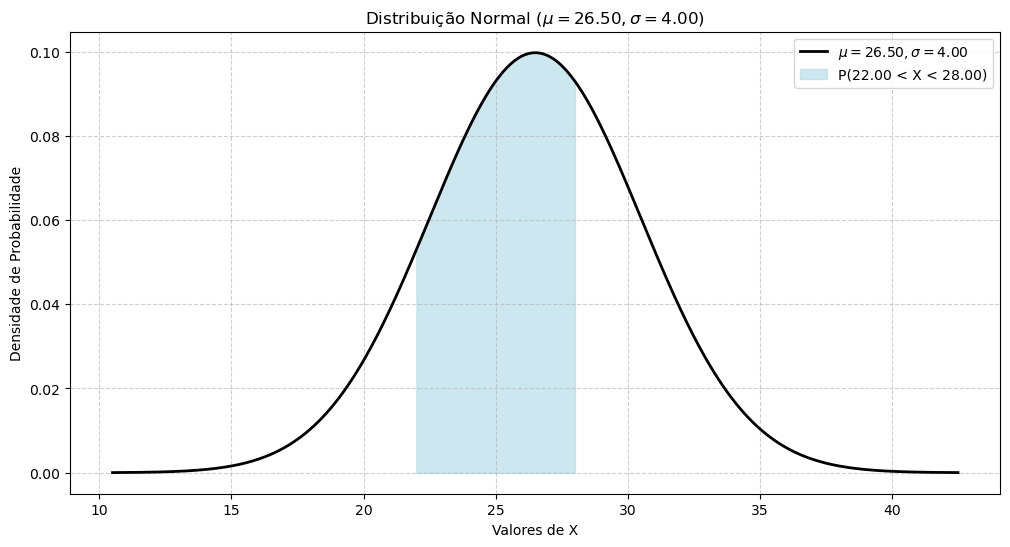


A probabilidade da região destacada é: 0.5159


In [41]:
# Função para plotar a distribuição normal 
def plot_normal_with_region_and_probability(media, desvio_padrao, tipo_probabilidade, valores, ax):
    x = np.linspace(media - 4 * desvio_padrao, media + 4 * desvio_padrao, 400)
    y = norm.pdf(x, media, desvio_padrao)
    ax.plot(x, y, 'k', linewidth=2, label=f'$\mu={media:.2f}, \sigma={desvio_padrao:.2f}$')
    ax.set_xlabel('Valores de X')
    ax.set_ylabel('Densidade de Probabilidade')
    ax.set_title(f'Distribuição Normal ($\mu={media:.2f}, \sigma={desvio_padrao:.2f}$)')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

    fill_color = 'lightblue'
    alpha_value = 0.6
    probabilidade = None

    if tipo_probabilidade == ">":
        x_fill = np.linspace(valores[0], media + 4 * desvio_padrao, 200)
        y_fill = norm.pdf(x_fill, media, desvio_padrao)
        ax.fill_between(x_fill, y_fill, color=fill_color, alpha=alpha_value, label=f'P(X > {valores[0]:.2f})')
        probabilidade = 1 - norm.cdf(valores[0], media, desvio_padrao)
    elif tipo_probabilidade == "<":
        x_fill = np.linspace(media - 4 * desvio_padrao, valores[0], 200)
        y_fill = norm.pdf(x_fill, media, desvio_padrao)
        ax.fill_between(x_fill, y_fill, color=fill_color, alpha=alpha_value, label=f'P(X < {valores[0]:.2f})')
        probabilidade = norm.cdf(valores[0], media, desvio_padrao)
    elif tipo_probabilidade == "<>":
        x_fill = np.linspace(valores[0], valores[1], 200)
        y_fill = norm.pdf(x_fill, media, desvio_padrao)
        ax.fill_between(x_fill, y_fill, color=fill_color, alpha=alpha_value, label=f'P({valores[0]:.2f} < X < {valores[1]:.2f})')
        probabilidade = norm.cdf(valores[1], media, desvio_padrao) - norm.cdf(valores[0], media, desvio_padrao)

    ax.legend()
    return probabilidade

# Entrada dos parâmetros da distribuição normal pelo usuário
media_x = float(input("Digite a média da distribuição normal: "))
desvio_padrao_x = float(input("Digite o desvio padrão da distribuição normal: "))

# Entrada interativa do tipo de probabilidade desejada para X
tipo_probabilidade_x = input("Digite o tipo de probabilidade desejada para X (>, < ou <>): ")
valores_x = []

if tipo_probabilidade_x == ">":
    valor_x = float(input("Digite o valor de x para P(X > x): "))
    valores_x = [valor_x]
elif tipo_probabilidade_x == "<":
    valor_x = float(input("Digite o valor de x para P(X < x): "))
    valores_x = [valor_x]
elif tipo_probabilidade_x == "<>":
    valor_inferior_x = float(input("Digite o valor inferior para P(a < X < b): "))
    valor_superior_x = float(input("Digite o valor superior para P(a < X < b): "))
    valores_x = [valor_inferior_x, valor_superior_x]
else:
    print("Tipo de probabilidade inválido.")
    exit()

# Criar o gráfico e obter a probabilidade
fig, ax = plt.subplots(figsize=(12, 6))
probabilidade_resultante = plot_normal_with_region_and_probability(media_x, desvio_padrao_x, tipo_probabilidade_x, valores_x, ax)
plt.show()

# Imprimir o valor da probabilidade
if probabilidade_resultante is not None:
    print(f"\nA probabilidade da região destacada é: {probabilidade_resultante:.4f}")